In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities

['humaita',
 'barrow',
 'mar del plata',
 'yellowknife',
 'grand river south east',
 'mataura',
 'itarema',
 'atuona',
 'saldanha',
 'irtyshskiy',
 'rikitea',
 'baiyin',
 'cap-chat',
 'ushuaia',
 'dickinson',
 'albany',
 'los llanos de aridane',
 'faanui',
 'pohrebyshche',
 'ust-omchug',
 'jieshi',
 'butaritari',
 'nizhneyansk',
 'kupang',
 'hermanus',
 'vaitupu',
 'tuktoyaktuk',
 'lebu',
 'punta arenas',
 'fowa',
 'pevek',
 'walvis bay',
 'flin flon',
 'tahta',
 'upernavik',
 'palmer',
 'toamasina',
 'kavieng',
 'broken hill',
 'kontagora',
 'geraldton',
 'katsuura',
 'aleksandrov gay',
 'kyabe',
 'cap malheureux',
 'reykjavik',
 'toora-khem',
 'dikson',
 'muzhi',
 'liwonde',
 'hilo',
 'new norfolk',
 'bonthe',
 'puerto ayora',
 'taolanaro',
 'charlestown',
 'khislavichi',
 'zhigansk',
 'kirovsk',
 'carnarvon',
 'saint anthony',
 'mumford',
 'daru',
 'porosozero',
 'sentyabrskiy',
 'mount gambier',
 'jamestown',
 'tobol',
 'saint-joseph',
 'khatanga',
 'liuzhou',
 'sedalia',
 'asau',


In [3]:
#Perform a weather check on each city using a series of successive API calls.
url = "https://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_key}&q="

weather_response = requests.get(query_url+"Toronto").json()
weather_response

#Include a print log of each city as it'sbeing processed (with the city number and city name).

{'coord': {'lon': -79.39, 'lat': 43.65},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 272.75,
  'pressure': 1023,
  'humidity': 62,
  'temp_min': 272.15,
  'temp_max': 274.15},
 'visibility': 14484,
 'wind': {'speed': 2.6, 'deg': 330},
 'clouds': {'all': 90},
 'dt': 1573181505,
 'sys': {'type': 1,
  'id': 941,
  'country': 'CA',
  'sunrise': 1573128053,
  'sunset': 1573164096},
 'timezone': -18000,
 'id': 6167865,
 'name': 'Toronto',
 'cod': 200}

In [22]:

print("Beginning Data Retrieval")     
print("------------------------------")
info = []
i = 0
for city in cities:
    info_cities = requests.get(query_url + city).json()
    i=i+1
    try:
        city = info_cities["name"]
        cloudiness = info_cities["clouds"]["all"]
        country = info_cities["sys"]["country"]
        date = info_cities["dt"]
        humidity = info_cities["main"]["humidity"]
        lat = info_cities["coord"]["lat"]
        long = info_cities["coord"]["lon"]
        temp_max = info_cities["main"]["temp_max"]
        wind_speed = info_cities["wind"]["speed"]
        info.append([city,cloudiness,country,date,humidity,lat,long,temp_max,wind_speed])
        print(f"Processing Record {i} | {city} " )
        time.sleep(.1)
        
    except:
        print("NA")
    

print("------------------------------")    
print("Data Retrieval Complete") 
print("------------------------------")

Beginning Data Retrieval
------------------------------
Processing Record 1 | Humaita 
Processing Record 2 | Barrow 
Processing Record 3 | Mar del Plata 
Processing Record 4 | Yellowknife 
NA
Processing Record 6 | Mataura 
Processing Record 7 | Itarema 
Processing Record 8 | Atuona 
Processing Record 9 | Saldanha 
Processing Record 10 | Irtyshskiy 
Processing Record 11 | Rikitea 
Processing Record 12 | Baiyin 
Processing Record 13 | Cap-Chat 
Processing Record 14 | Ushuaia 
Processing Record 15 | Dickinson 
Processing Record 16 | Albany 
Processing Record 17 | Los Llanos de Aridane 
Processing Record 18 | Faanui 
Processing Record 19 | Pohrebyshche 
Processing Record 20 | Ust-Omchug 
Processing Record 21 | Jieshi 
Processing Record 22 | Butaritari 
NA
Processing Record 24 | Kupang 
Processing Record 25 | Hermanus 
NA
Processing Record 27 | Tuktoyaktuk 
Processing Record 28 | Lebu 
Processing Record 29 | Punta Arenas 
Processing Record 30 | Fowa 
Processing Record 31 | Pevek 
Processing

Processing Record 266 | Touros 
Processing Record 267 | Carutapera 
Processing Record 268 | Port Macquarie 
Processing Record 269 | Bara 
Processing Record 270 | Nang Rong 
Processing Record 271 | Teguise 
Processing Record 272 | Mecca 
Processing Record 273 | Cuamba 
Processing Record 274 | Las Cruces 
Processing Record 275 | Victoria 
NA
Processing Record 277 | Acapulco 
Processing Record 278 | Mogok 
Processing Record 279 | Bridlington 
Processing Record 280 | Bandarbeyla 
Processing Record 281 | Jacareacanga 
NA
Processing Record 283 | Winnemucca 
Processing Record 284 | Vila Franca do Campo 
Processing Record 285 | Hami 
Processing Record 286 | Turka 
Processing Record 287 | Lodeynoye Pole 
Processing Record 288 | Kavaratti 
Processing Record 289 | Manakara 
Processing Record 290 | Chokurdakh 
Processing Record 291 | Grand Gaube 
Processing Record 292 | Guerrero Negro 
Processing Record 293 | Greenfield 
Processing Record 294 | Man 
Processing Record 295 | Hun 
Processing Record 2

Processing Record 534 | Kaniama 
Processing Record 535 | Alanya 
Processing Record 536 | Karasjok 
Processing Record 537 | Benjamin Hill 
Processing Record 538 | Lastoursville 
Processing Record 539 | Sohag 
Processing Record 540 | San Andres 
NA
Processing Record 542 | Severodvinsk 
Processing Record 543 | Rosita 
Processing Record 544 | Yongan 
Processing Record 545 | Boa Vista 
Processing Record 546 | Klishkivtsi 
Processing Record 547 | Sainte-Suzanne 
Processing Record 548 | Sinnamary 
NA
Processing Record 550 | Kathmandu 
Processing Record 551 | Juegang 
NA
NA
Processing Record 554 | Itapirapua 
NA
Processing Record 556 | Madimba 
Processing Record 557 | Elat 
Processing Record 558 | Tuzha 
Processing Record 559 | Valparaiso 
Processing Record 560 | Fortuna 
Processing Record 561 | Haverfordwest 
Processing Record 562 | George 
Processing Record 563 | Chulman 
Processing Record 564 | Rabo de Peixe 
Processing Record 565 | Tel Aviv-Yafo 
Processing Record 566 | Cody 
Processing Re

In [25]:
#Export the city data into a .csv.
#Display the DataFrame

df = pd.DataFrame(info,columns=["city","cloudiness","country","date","humidity","lat","long","temp_max","wind_speed"])
df.head()

,city,cloudiness,country,date,humidity,lat,long,temp_max,wind_speed
0,Humaita,40,AR,1573182962,88,-24.93,-65.37,296.15,1.50
1,Barrow,2,AR,1573182962,91,-38.31,-60.23,279.41,3.09
2,Mar del Plata,0,AR,1573182962,33,-46.43,-67.52,284.25,11.26
3,Yellowknife,90,CA,1573182962,78,62.45,-114.38,263.15,4.10
4,Mataura,37,NZ,1573182805,39,-46.19,168.86,293.40,5.01


In [26]:
df.count()

city          551
cloudiness    551
country       551
date          551
humidity      551
lat           551
long          551
temp_max      551
wind_speed    551
dtype: int64

In [27]:
date = time.strftime("%d/%m/%y")
date

'07/11/19'

<Figure size 432x288 with 0 Axes>

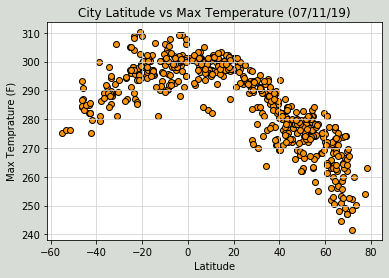

In [35]:
plt.figure(facecolor=(1, 1, 1)) 
fig = plt.figure() 
fig.patch.set_facecolor("#d8dcd6") 
plt.scatter(df["lat"],df["temp_max"], c="#ff9408", edgecolor="black") 
plt.title(f"City Latitude vs Max Temperature ({date})") 
plt.ylabel("Max Temprature (F)") 
plt.xlabel("Latitude") 
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey") 
plt.savefig("fig1.png")

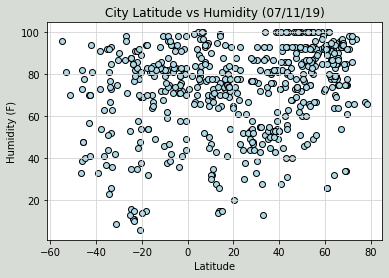

In [34]:
fig = plt.figure() 
fig.patch.set_facecolor("#d8dcd6") 
plt.scatter(df["lat"],df["humidity"], c="lightblue", edgecolor="black") 
plt.title(f"City Latitude vs Humidity ({date})") 
plt.ylabel("Humidity (F)") 
plt.xlabel("Latitude") 
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey") 
plt.savefig("fig2.png")

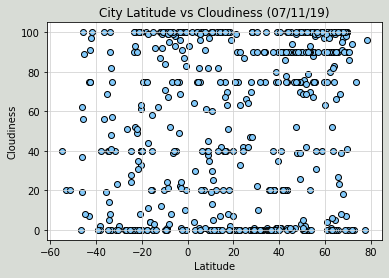

In [38]:
fig = plt.figure() 
fig.patch.set_facecolor("#d8dcd6") 
plt.scatter(df["lat"],df["cloudiness"], c="#82cafc", edgecolor="black") 
plt.title(f"City Latitude vs Cloudiness ({date})") 
plt.ylabel("Cloudiness") 
plt.xlabel("Latitude") 
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey") 
plt.savefig("fig3.png")

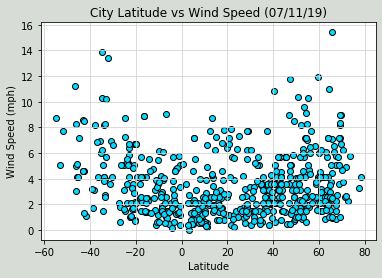

In [42]:
fig = plt.figure() 
fig.patch.set_facecolor("#d8dcd6") 
plt.scatter(df["lat"],df["wind_speed"], c="#04d9ff", edgecolor="black") 
plt.title(f"City Latitude vs Wind Speed ({date})") 
plt.ylabel("Wind Speed (mph)") 
plt.xlabel("Latitude") 
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey") 
plt.savefig("fig4.png")